In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pyodbc

# GIỚI THIỆU DỰ ÁN
1. Mục tiêu của dự án:  Phân tích khách hàng và sản phẩm là phân tích dữ liệu từ cơ sở dữ liệu hồ sơ bán hàng dành cho ô tô mô hình quy mô và trích xuất thông tin để đưa ra quyết định.


2. Một số câu hỏi dành cho dự án:

   a/ Chúng ta nên đặt mua nhiều hay ít sản phẩm nào? 

   b/ Chúng ta nên điều chỉnh chiến lược tiếp thị và truyền thông như thế nào cho phù hợp với hành vi của khách hàng

   c/ Chúng ta có thể chi bao nhiêu tiền để có được khách hàng mới


# TỔNG QUAN VỀ DỮ LIỆU
Dữ liệu của một đại lý bán xe, gồm 8 bảng:

- Customers: dữ liệu khách hàng 
- Employees: tất cả thông tin nhân viên
- Offices: thông tin văn phòng bán hàng
- Orders: Đơn đặt hàng của khách hàng
- OrderDetails: Chi tiết thông tin bán hàng cho mỗi đơn hàng
- Payments: Hồ sơ thanh toán của khách hàng
- Products: Danh sách xe mô hình
- ProductLines: Danh sách các dòng sản phẩm

Dưới đây là sơ đồ relationship giữa các bảng:

![](relationship.png)

# KẾT NỐI PYTHON VỚI SQL SERVER:

In [10]:
conn = pyodbc.connect('DRIVER={SQL Server}; SERVER=DESKTOP-6J6UI2N\ANH; Database=stores; TRUSTED_CONNECTION=yes')

# TÌM HIỂU DỮ LIỆU

In [20]:
query = ''' 
SELECT 'Customers' AS Table_name, '13' AS Số_thuộc_tính, COUNT(*) AS Số_hàng FROM Customers
UNION ALL
SELECT 'Employees' AS Table_name,'8' as Số_thuộc_tính, COUNT(*) AS Số_hàng FROM employees
UNION ALL
SELECT 'Offices' AS Table_name, '9' AS Số_thuộc_tính, COUNT(*) AS Số_hàng FROM offices
UNION ALL
SELECT 'Order' AS Table_name, '7' AS Số_thuộc_tính, COUNT(*) AS Số_hàng FROM orders
UNION ALL
SELECT 'Orderdetails' AS Table_name, '5' AS Số_thuộc_tính, COUNT(*) AS Số_hàng FROM orderdetails
UNION ALL
SELECT 'Payments' AS Table_name, '4' AS Số_thuộc_tính, COUNT(*) AS Số_hàng FROM payments
UNION ALL
SELECT 'Products' AS Table_name, '9' AS Số_thuộc_tính, COUNT(*) AS Số_hàng FROM products
UNION ALL
SELECT 'Productline' AS Table_name, '4' AS Số_thuộc_tính, COUNT(*) AS Số_hàng FROM Productlines
'''

In [24]:
detail_table = pd.read_sql_query(query,conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13584\1810578856.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detail_table = pd.read_sql_query(query,conn)


In [25]:
detail_table

,Table_name,Số_thuộc_tính,Số_hàng
0,Customers,13,122
1,Employees,8,23
2,Offices,9,7
3,Order,7,326
4,Orderdetails,5,2996
5,Payments,4,273
6,Products,9,110
7,Productline,4,7


# PHÂN TÍCH DỮ LIỆU

## •	Câu hỏi 1: Chúng ta nên đặt hàng nhiều hay ít sản phẩm nào?

- Câu hỏi này đề cập dến báo cáo về hàng tồn kho, bao gồm cả lượng hàng tồn kho thấp (tức là sản phẩm đang được người tiêu dùng quan tâm) và hiệu suất của sản phẩm. Điều này sẽ tối ưu hóa nguồn cung và trải nghiệm người tiêu dùng bằng cách ngăn chặn các sản phẩm bán chạy nhất bị hết hàng

- Lượng hàng tồn kho thấp thể hiện số lượng của mỗi sản phẩm được tính bằng số lượng đặt hàng chia cho số lượng sản phẩm trong kho. Chúng ta có thể xem xét 10 tỷ lệ cao nhất và đây sẽ là top 10 sản phẩm gần như hết hàng hoặc hết hàng hoàn toàn.

 TỶ LỆ HÀNG TỒN KHO   =  SUM(quantityOrdered)/ QuantityInStocK

- Hiệu suất sản phẩm thể hiện tổng doanh thu trên mỗi sản phẩm

 HIỆU SUẤT SẢN PHẨM = "SUM(quantityOrdered x priceEach)" 

### TOP 10 SẢN PHẨM CÓ HIỆU SUẤT SẢN PHẨM CAO NHẤT

In [35]:
query_1 = '''
SELECT TOP 10 productCode,
       SUM(quantityOrdered * priceEach) as product_performance
FROM orderdetails
GROUP BY productCode
ORDER BY product_performance DESC'''

In [36]:
prfm = pd.read_sql_query(query_1, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13584\106039975.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  prfm = pd.read_sql_query(query_1, conn)


In [37]:
prfm

,productCode,product_performance
0,S18_3232,276839.98
1,S12_1108,190755.86
2,S10_1949,190017.96
3,S10_4698,170686.00
4,S12_1099,161531.48
5,S12_3891,152543.02
6,S18_1662,144959.91
7,S18_2238,142530.63
8,S18_1749,140535.60
9,S12_2823,135767.03


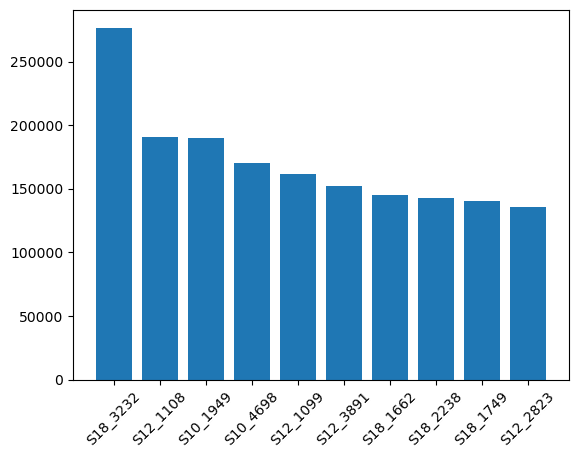

In [40]:
plt.bar(prfm['productCode'], prfm['product_performance'])
plt.xticks(rotation = 45)
plt.show()

### TOP 10 SẢN PHẨM CÓ TỶ LỆ TỒN KHO THẤP NHẤT

In [44]:
query_2 = '''
SELECT TOP 10 od.productCode, 
       ROUND(SUM(quantityOrdered)/(SELECT quantityInStock
                                  FROM products as p 
                                  WHERE p.productCode = od.ProductCode),2) AS low_stock
FROM orderdetails AS od
GROUP BY od.productCode
ORDER BY low_stock
'''

In [45]:
lowstock = pd.read_sql_query(query_2,conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13584\3671449695.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  lowstock = pd.read_sql_query(query_2,conn)


In [46]:
lowstock

,productCode,low_stock
0,S18_1984,0.09
1,S24_3432,0.09
2,S12_3380,0.10
3,S32_2206,0.10
4,S700_2466,0.10
5,S18_2325,0.10
6,S18_2870,0.10
7,S12_2823,0.10
8,S18_3482,0.10
9,S18_1589,0.10


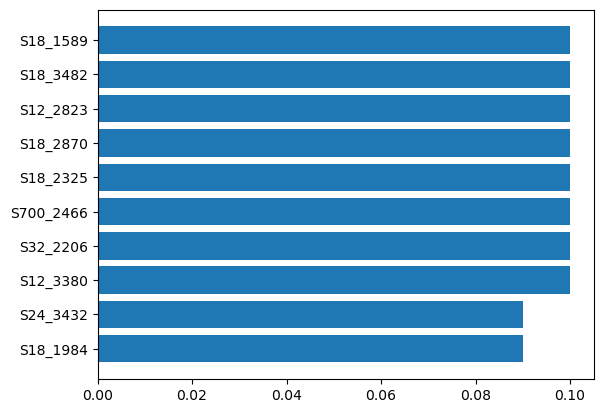

In [53]:
plt.barh(lowstock['productCode'], lowstock['low_stock'])
plt.show()

### Các sản phẩm ưu tiên nhập kho là những sản phẩm có hiệu suất sản phẩm cao và đang có nguy cơ hết hàng

In [48]:
query_3 = '''
WITH 
prfm AS (
SELECT productCode,
       sum(quantityOrdered) as sum_quan,
       sum(quantityOrdered * priceEach) as product_performance
FROM orderdetails
GROUP BY productCode
),
lowstock AS (
SELECT TOP 10 p.productCode, p.productName, p.productLine,
       SUM(quantityOrdered) as sum_quan,
       ROUND(SUM(quantityOrdered)/p.quantityInStock,2) as low_stock
FROM products AS p 
JOIN orderdetails AS od ON p.productCode = od.productCode
GROUP BY p.productCode, p.productName,p.productLine, p.quantityInStock
ORDER BY low_stock
)
SELECT pr.productCode,
       ls.productName,
       ls.productLine,
       pr.product_performance,
       ls.low_stock,
       ls.sum_quan
FROM lowstock AS ls
JOIN prfm AS pr ON pr.productCode = ls.productCode
ORDER BY pr.product_performance DESC
'''

In [49]:
ques_1 = pd.read_sql_query(query_3, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13584\2621762489.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ques_1 = pd.read_sql_query(query_3, conn)


In [50]:
ques_1

,productCode,productName,productLine,product_performance,low_stock,sum_quan
0,S12_2823,2002 Suzuki XREO,Motorcycles,135767.03,0.10,1028.0
1,S18_3482,1976 Ford Gran Torino,Classic Cars,121890.60,0.10,915.0
2,S18_1984,1995 Honda Civic,Classic Cars,119050.95,0.09,917.0
3,S18_2325,1932 Model A Ford J-Coupe,Vintage Cars,109992.01,0.10,957.0
4,S18_1589,1965 Aston Martin DB5,Classic Cars,101778.13,0.10,914.0
5,S18_2870,1999 Indy 500 Monte Carlo SS,Classic Cars,100770.12,0.10,855.0
6,S12_3380,1968 Dodge Charger,Classic Cars,98718.76,0.10,925.0
7,S700_2466,America West Airlines B757-200,Planes,89347.80,0.10,984.0
8,S24_3432,2002 Chevy Corvette,Classic Cars,87404.81,0.09,894.0
9,S32_2206,1982 Ducati 996 R,Motorcycles,33268.76,0.10,906.0


=> Sau khi phân tích kết quả truy vấn đưa ra 10 sản phẩm có lượng hàng tồn kho thấp và hiệu suất sản phẩm cao, nhận thấy trong 10 sản phẩm trên thì có 6 sản phẩm thuộc dòng sản phẩm ‘Classic Cars’. Những sản phẩm này được bán thường xuyên với hiệu suất sản phẩm cao. Vì vậy, chúng ta nên bổ sung chúng lại chúng thường xuyên.

## •	Câu hỏi 2: Chúng ta nên kết hợp chiến lược tiếp thị và truyền thông với hành vi của khách hàng như thế nào?

- Câu hỏi này được đưa ra để khám phá thông tin khách hàng. Điều này liên quan đến việc phân loại khách hàng: Tìm khách hàng VIP và những người ít tương tác hơn.
  + Khách hàng VIP mang lại nhiều lợi nhuận nhất cho cửa hàng.
  + Khách hàng ít tương tác sẽ mang lại ít lợi nhuận hơn cho cửa hàng.
- Sau khi phân loại khách hàng, chúng ta có thể tổ chức một số sự kiện nâng cao lòng trung thành của các VIP và khởi động chiến dịch dành cho những người ít tham gia hơn.
- Để trả lời câu hỏi cần tính toán lợi nhuận cho mỗi khách hàng bằng công thức:
      PROFIT PER CUS = SUM(quantityOrdered * (PriceEach - buyPrice))

### 5 KHÁCH HÀNG MANG LẠI LỢI NHUẬN CAO NHẤT (5 KHÁCH HÀNG VIP)

In [63]:
query_4 = '''
WITH profit AS
(
SELECT customerNumber, 
       SUM(quantityOrdered * (priceEach - buyPrice)) as profit_per_cus
FROM products AS p
JOIN orderdetails AS od ON p.productCode = od.productCode
JOIN orders AS o ON o.orderNumber = od.orderNumber
GROUP BY customerNumber
)
SELECT TOP 5 CONCAT(c.contactFirstName,' ',c.contactLastName) AS customer_name,
       c.city,
       c.country,
       p.profit_per_cus
FROM profit AS p
JOIN customers AS c ON c.customerNumber = p.customerNumber
ORDER BY p.profit_per_cus DESC
'''

In [64]:
top_5_VIP = pd.read_sql_query(query_4, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13584\962310886.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_5_VIP = pd.read_sql_query(query_4, conn)


In [65]:
top_5_VIP

,customer_name,city,country,profit_per_cus
0,Diego Freyre,Madrid,Spain,326519.66
1,Susan Nelson,San Rafael,USA,236769.39
2,Jeff Young,NYC,USA,72370.09
3,Peter Ferguson,Melbourne,Australia,70311.07
4,Janine Labrune,Nantes,France,60875.30


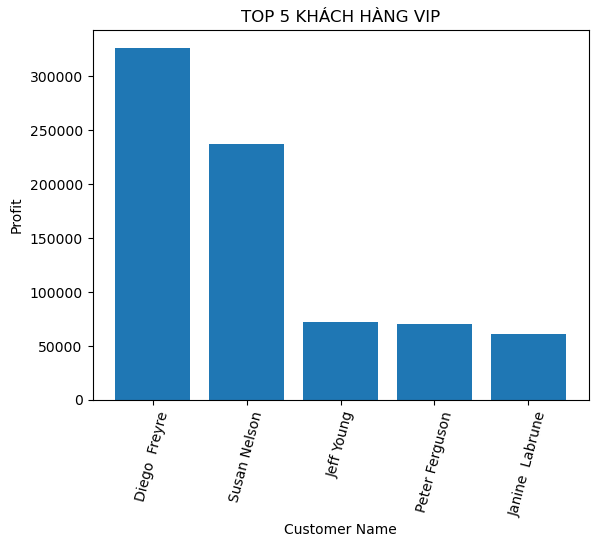

In [73]:
plt.bar(top_5_VIP['customer_name'],top_5_VIP['profit_per_cus'])
plt.xticks(rotation = 75)
plt.xlabel('Customer Name')
plt.ylabel('Profit')
plt.title('TOP 5 KHÁCH HÀNG VIP')
plt.show()

## TOP 5 KHÁCH HÀNG ÍT TƯƠNG TÁC NHẤT

In [74]:
query_5 = '''
WITH profit AS
(
SELECT customerNumber, 
       SUM(quantityOrdered * (priceEach - buyPrice)) as profit_per_cus
FROM products AS p
JOIN orderdetails AS od ON p.productCode = od.productCode
JOIN orders AS o ON o.orderNumber = od.orderNumber
GROUP BY customerNumber
)
SELECT TOP 5 CONCAT(c.contactFirstName,' ',c.contactLastName) AS customer_name,
       c.city,
       c.country,
       p.profit_per_cus
FROM profit AS p
JOIN customers AS c ON c.customerNumber = p.customerNumber
ORDER BY p.profit_per_cus
'''

In [75]:
top_5_low_profit = pd.read_sql_query(query_5, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13584\2054996169.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_5_low_profit = pd.read_sql_query(query_5, conn)


In [76]:
top_5_low_profit

,customer_name,city,country,profit_per_cus
0,Mary Young,Glendale,USA,2610.87
1,Leslie Taylor,Brickhaven,USA,6586.02
2,Franco Ricotti,Milan,Italy,9532.93
3,Carine Schmitt,Nantes,France,10063.80
4,Thomas Smith,London,UK,10868.04


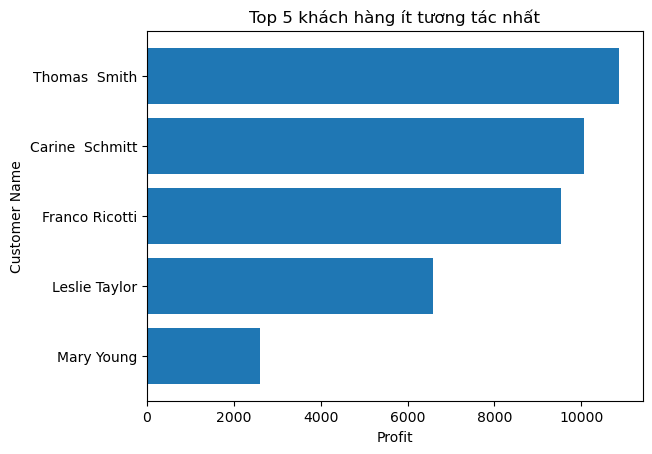

In [79]:
plt.barh(top_5_low_profit['customer_name'],top_5_low_profit['profit_per_cus'])
plt.xlabel('Profit')
plt.ylabel('Customer Name')
plt.title('Top 5 khách hàng ít tương tác nhất')
plt.show()

=> Từ kết quả truy vấn trên, chúng ta có thể xác định được các khách hàng VIP và khách hàng có ít tương tác nhất. Từ đó, chúng ta nên có những phần thưởng, dịch vụ ưu tiên dành cho những khách hàng trung thành để giữ chân họ. Ngoài ra, đối với những khách hàng ít tương tác với cửa hàng, chúng ta cần tiến hành khảo sát phản hồi của họ để hiểu rõ hơn về sở thích của họ. Bên cạnh đó, chúng ta cũng cần tạo ra những chiến dịch giảm giá, ưu đãi để tăng doanh số bán hàng.

## •	Câu hỏi 3: Chúng ta có thể chi bao nhiêu để thu hút khách hàng mới?

- Trước khi trả lời câu hỏi này, chúng ta cần tìm số lượng khách hàng mới đến mỗi tháng. Bằng cách đó, chúng ta có thể kiểm tra xem liệu việc chi tiền để thu hút khách hàng mới có đáng hay không. 
- Truy vấn dưới đây giúp tìm kiếm lượng khách hàng mới mỗi tháng:


In [95]:
query_6 = '''
WITH 
payment_with_year_month_table AS
(
SELECT *,
       CAST( SUBSTRING(CONVERT(varchar(15),paymentdate,112),1,4) AS INT)*100 + CAST(SUBSTRING(CONVERT(varchar(15),paymentdate,112),5,2) AS INT) as year_month
  FROM payments AS p
),
customers_by_month_table AS
(
  SELECT p1.year_month,
       COUNT(*) AS number_of_customers,
       SUM(p1.amount) AS total
    FROM payment_with_year_month_table p1
GROUP BY p1.year_month
),
new_customers_by_month_table AS 
(
  SELECT p1.year_month,
         COUNT(*) AS number_of_new_customers,
         SUM(p1.amount) AS new_customer_total,
        (SELECT number_of_customers 
           FROM customers_by_month_table AS c
          WHERE c.year_month = p1.year_month) AS number_of_customers,
        (SELECT total 
           FROM customers_by_month_table AS c
          WHERE c.year_month = p1.year_month) AS total
    FROM payment_with_year_month_table p1
   WHERE p1.customerNumber NOT IN (SELECT customerNumber
                                   FROM payment_with_year_month_table AS p2
                                   WHERE p2.year_month < p1.year_month)
GROUP BY p1.year_month
)
SELECT year_month,
 ROUND(number_of_new_customers *100/number_of_customers,1) AS number_of_new_customers_props,
 ROUND(new_customer_total*100/total,1) AS new_customers_total_props
  FROM new_customers_by_month_table

'''

In [98]:
new_cus = pd.read_sql_query(query_6, conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13584\2517856258.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  new_cus = pd.read_sql_query(query_6, conn)


In [99]:
new_cus

,year_month,number_of_new_customers_props,new_customers_total_props
0,200301,100,100.0
1,200302,100,100.0
2,200303,100,100.0
3,200304,100,100.0
4,200305,100,100.0
5,200306,100,100.0
6,200307,75,68.3
7,200308,66,54.2
8,200309,80,95.9
9,200310,69,69.3


=> Từ bảng trên có thể nhận thấy số lượng khách hàng đã giảm kể từ năm 2003 và giá trị thấp nhất là vào năm 2004. Năm 2005 có trong cơ sở dữ liệu nhưng lại không có trong bảng truy vấn trên, điều này có nghĩa là cửa hàng không có bất kỳ khách hàng mới nào kể từ tháng 9/2004. Như thế, ta có thể đưa ra nhận định rằng việc chi tiền để có được khách hàng mới là hợp lý.

- Để xác định số tiền mà cửa hàng có thể chi để thu hút khách hàng mới, chúng ta có thể tính giá trị vòng đời khách khàng (LTV), đại diện cho số tiền trung bình mà khách hàng tạo ra. Sau đó, chúng ta có thể xác định số tiền mà có thể chi cho marketing. 

- Lợi nhuận trung bình của mỗi khách hàng được tính như sau:


In [102]:
query_7 = '''
WITH profit AS
(
  SELECT customerNumber,
         SUM(quantityOrdered * (priceEach - buyPrice)) as profit_per_cus
    FROM products AS p 
    JOIN  orderdetails AS od ON p.productCode = od.productCode
    JOIN orders AS o ON o.orderNumber = od.orderNumber
GROUP BY customerNumber
)
SELECT ROUND(AVG(profit_per_cus),2) AS LTV
  FROM profit
'''

In [103]:
LTV = pd.read_sql_query(query_7,conn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13584\1217786535.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  LTV = pd.read_sql_query(query_7,conn)


In [104]:
LTV

,LTV
0,39039.59


=> Từ kết quả truy vấn trên, có thể thấy giá trị vòng đời khách hàng tại cửa hàng là 39,040 USD. Điều này có nghĩa là với mỗi khách hàng mới, cửa hàng sẽ kiếm được lợi nhuận là 39,040 USD. Từ thông tin này chúng ta có thể dự đoán số tiền mà cửa hàng có thể chi trả cho việc thu hút khách hàng mới, đồng thời duy trì hoặc tăng mức lợi nhuận của mình. 

# TỔNG KẾT

CÂU HỎI 1: Chúng ta nên đặt hàng nhiều hay ít sản phẩm nào?
- Sau khi phân tích kết quả truy vấn đưa ra 10 sản phẩm có lượng hàng tồn kho thấp và hiệu suất sản phẩm cao, nhận thấy trong 10 sản phẩm trên thì có 6 sản phẩm thuộc dòng sản phẩm ‘Classic Cars’. Những sản phẩm này được bán thường xuyên với hiệu suất sản phẩm cao. Vì vậy, chúng ta nên bổ sung chúng lại chúng thường xuyên.

CÂU HỎI 2:Chúng ta nên kết hợp chiến lược tiếp thị và truyền thông với hành vi của khách hàng như thế nào?
- Từ kết quả truy vấn trên, chúng ta có thể xác định được các khách hàng VIP và khách hàng có ít tương tác nhất. Từ đó, chúng ta nên có những phần thưởng, dịch vụ ưu tiên dành cho những khách hàng trung thành để giữ chân họ. Ngoài ra, đối với những khách hàng ít tương tác với cửa hàng, chúng ta cần tiến hành khảo sát phản hồi của họ để hiểu rõ hơn về sở thích của họ. Bên cạnh đó, chúng ta cũng cần tạo ra những chiến dịch giảm giá, ưu đãi để tăng doanh số bán hàng.

CÂU HỎI 3:Chúng ta có thể chi bao nhiêu để thu hút khách hàng mới?
- Có thể thấy giá trị vòng đời khách hàng tại cửa hàng là 39,040 USD. Điều này có nghĩa là với mỗi khách hàng mới, cửa hàng sẽ kiếm được lợi nhuận là 39,040 USD. Từ thông tin này chúng ta có thể dự đoán số tiền mà cửa hàng có thể chi trả cho việc thu hút khách hàng mới, đồng thời duy trì hoặc tăng mức lợi nhuận của mình. 